In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('Hitters.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
df = df.dropna()

In [6]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 train_size=0.25,
                                                 random_state=42)

In [8]:
lasso_model = Lasso().fit(X_train,y_train)

c:\Users\omerf\anaconda3\envs\tensoeflow2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.305e+06, tolerance: 8.664e+02
  model = cd_fast.enet_coordinate_descent(


In [9]:
lasso_model.intercept_

103.83220531563279

In [10]:
lasso_model.coef_

array([-2.13711665e+00,  1.09085196e+01, -1.81333657e+01, -7.47000505e+00,
        6.25413992e+00,  4.10119089e+00, -2.04369601e+01, -9.79875738e-04,
       -5.78679923e-01,  4.59324587e+00,  2.33450419e+00, -3.78427235e-01,
       -1.21203889e+00,  2.45617155e-03,  8.75938253e-02, -4.89654456e-01,
        1.44364123e+02, -8.22903102e+01,  6.85949589e+01])

In [15]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000000,100)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

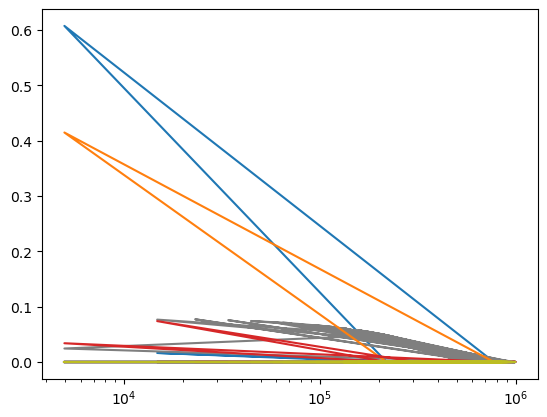

In [16]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')

In [17]:
lasso_model

Lasso()

In [18]:
lasso_model.predict(X_train)[0:5]

array([1303.23521609,  795.79319587,  820.7242463 ,  313.50701457,
        819.81860655])

In [19]:
lasso_model.predict(X_test)[0:5]

array([293.38360627, 855.79676414, 517.06329878, 468.28093607,
       136.55226338])

In [20]:
y_pred = lasso_model.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test,y_pred))

395.49660144932886

In [22]:
# Bağımsız değişkenlerce bağımlı değişkenlerdeki değişikliğin açıklanma yüzdesi
r2_score(y_test,y_pred)

0.3007945121260107

## Model Tuning

In [30]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [31]:
lasso_cv_model = LassoCV(alphas=alphas,cv=10,max_iter=100000).fit(X_train,y_train)

In [32]:
lasso_cv_model.alpha_

123853.81779958545

In [42]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [46]:

lasso_tuned2= Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [47]:
y_pred = lasso_tuned2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

428.8955864900894

In [48]:
pd.Series(lasso_tuned2.coef_ , index=X_train.columns)

AtBat          0.00000
Hits           0.00000
HmRun          0.00000
Runs           0.00000
RBI            0.00000
Walks          0.00000
Years          0.00000
CAtBat         0.06224
CHits          0.00000
CHmRun         0.00000
CRuns          0.00000
CRBI           0.00000
CWalks         0.00000
PutOuts        0.00000
Assists        0.00000
Errors         0.00000
League_N       0.00000
Division_W    -0.00000
NewLeague_N    0.00000
dtype: float64